# **Insurance Cost Analysis**

In this project, we will conduct analytical operations on an insurance database, utilizing the parameters listed below, to develop a predictive model for estimating medical charges. The dataset used for this project is from [Kaggle](https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction?resource=download).

| Parameter |Description| Content type |
|---|----|---|
|age | Age in years| integer |
|sex | Feale or Male|integer (1 or 2)|
| bmi | Body mass index | float |
|children| Number of children | integer|
|smoker| Whether smoker or not | integer (1 or 0)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
 - Load the data as a `pandas` dataframe
 - Clean the data
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 

### Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

# Task 1 : Importing the dataset

Import dataset into a `pandas` dataframe. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [5]:
file = 'Medical_insurance.csv'
df = pd.read_csv(file)

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
# Shape of the dataset
df.shape

(2772, 7)

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# Descriptive Statistics of the dataset
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772,2772.000000,2772.000000,2772,2772,2772.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1406,NaN,NaN,2208,766,NaN
mean,39.109668,NaN,30.701349,1.101732,NaN,NaN,13261.369959
std,14.081459,NaN,6.129449,1.214806,NaN,NaN,12151.768945
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4687.797000
50%,39.000000,NaN,30.447500,1.000000,NaN,NaN,9333.014350
75%,51.000000,NaN,34.770000,2.000000,NaN,NaN,16577.779500


The dataset consists of 2,772 rows and 7 columns, with the average values for the columns age, BMI, and charges being 39, 30.701, and 13,261.369, respectively.

# Task 2 : Data Wrangling

Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


No Null values in the dataset

* Replace each category in (age, smoker, and region) columns with numbers
* Update the data type of the respective columns to integer
* Rename the `sex` column to `gender` and `children` to `no_of_children`
* Round up the charge attribute values to 2 decimal places
Below is the table guide

| Column | Categorical Value | Assigned Numerical Value |
|--------|----------|-----------|
| sex| female, male | 1, 2 respectively|
| smoker | yes, no | 1, 0 respectively|
| region | NW, NE, SW, SE | 1, 2, 3, 4 respectively

In [15]:
# Male and Female values replaced and the data type changed to int
df['sex'] = df['sex'].replace({'female': '1', 'male':'2'}).astype('int64')

# yes and no values replaced and the data type changed to int
df['smoker'] = df['smoker'].replace({'yes': '1', 'no': '0'}).astype('int64')

# the four region category replaced and the data type changed to int
df['region'] = df['region'].replace({'northwest': '1', 'northeast': '2', 'southwest': '3', 'southeast': '4'}).astype('int64')

# Rename column names
df.rename(columns={'sex':'gender', 'children':'no_of_children'}, inplace=True)

# charge attribute values rounded up to 2 d.p
df[['charges']] = np.round(df[['charges']], 2)

# print first rows to confirm our changes
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


# Task 3 : Exploratory Data Analysis (EDA)

Using Visuals to explore our data

Text(0.5, 1.0, 'Age vs Charges')

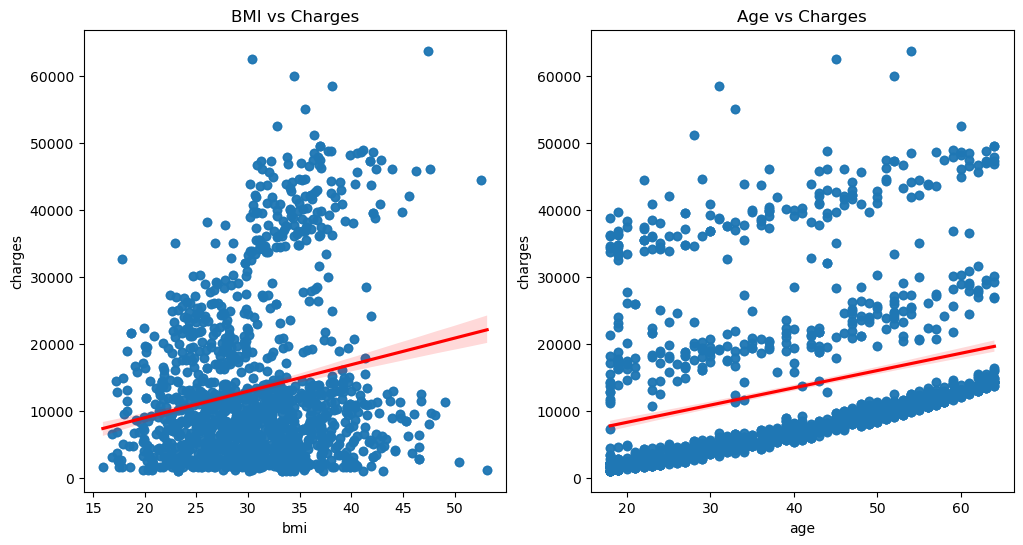

In [18]:
# Scatter plot to visualize charges with respect to age and bmi
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

reg_line = {'color': 'red'}
sns.regplot(x='bmi', y='charges', data=df, line_kws=reg_line, ax=axs[0])
axs[0].set_title('BMI vs Charges')

sns.regplot(x='age', y='charges', data=df, line_kws=reg_line, ax=axs[1])
axs[1].set_title('Age vs Charges')

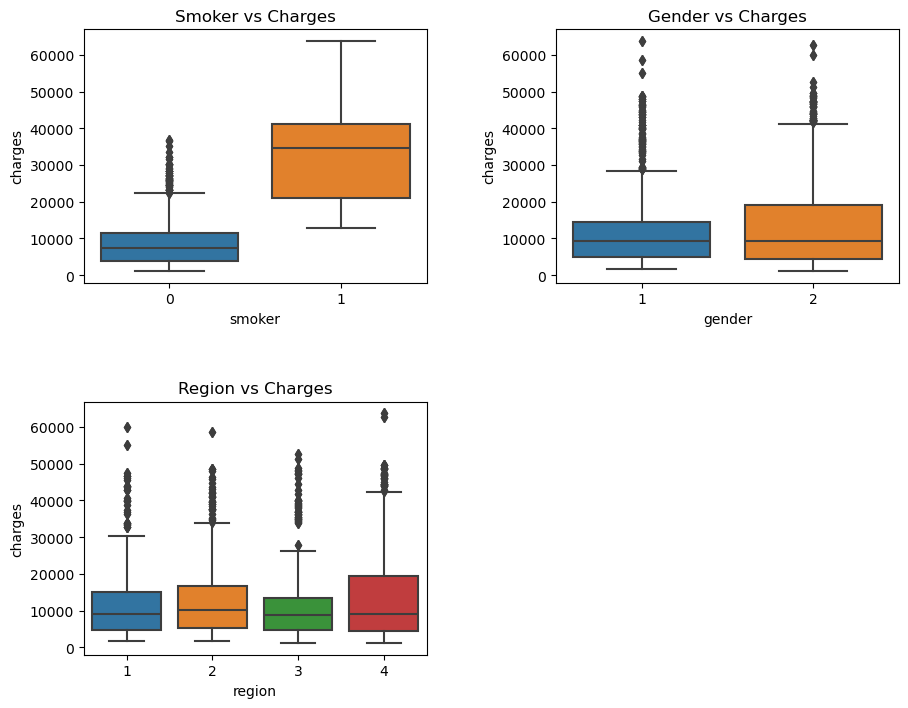

In [19]:
# Box plot to visualize charges with respect to our initially categorical attributes (gender, smoker, region)
fig1, axs1 = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(x='smoker', y='charges', data=df, ax=axs1[0,0])
axs1[0,0].set_title('Smoker vs Charges')

sns.boxplot(x='gender', y='charges', data=df, ax=axs1[0,1])
axs1[0,1].set_title('Gender vs Charges')

sns.boxplot(x='region', y='charges', data=df, ax=axs1[1,0])
axs1[1,0].set_title('Region vs Charges')

axs1[1,1].axis('off')

plt.tight_layout(pad=4.0)

Let's check the strength and direction of the linear relationship between the variables

In [21]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


The analysis of the relationship between independent variables and medical charges using Pearson correlation shows that `smoker` is the most influential factor, with a strong positive correlation of 0.788783. This suggests that smoking is strongly associated with higher medical charges due to increased health risks. `Age` and `BMI` also have positive correlations with charges, but their relationships are weaker than that of smoking.
The Pearson correlation values of 0.062837 for `gender` and 0.054058 for `region` with respect to medical charges suggest a very weak positive relationship between these variables and charges. In practical terms, this means that there is almost no linear relationship between gender, region, and medical charges. Since the values are very close to 0, it indicates that gender and region have little effect to no effect on the medical charges.

# Task 4 : Model Development

In this section, we will develop a predictive model aimed at forecasting `charges`, a continuous variable. Given the nature of the target variable, a linear regression model is the most appropriate choice. We will implement both Simple Linear Regression (SLR) and Multiple Linear Regression (MLR), in addition to a Polynomial Regression model with multiple independent variables.

### Simple Linear Reression

We will use `smoker` as the independent variable to fit a linear regression model and evaluate its performance using metrics such as the Coefficient of Determination ( R^2 )  and Mean Squared Error (MSE).

In [27]:
# Define our independent and target variable
x = df[['smoker']]
y = df['charges']

# Define a linear regression object and fit the model
lm = LinearRegression()
lm.fit(x, y)

# Produce the prediction 
yhat = lm.predict(x)

# Evaluate the model
r2 = lm.score(x, y)
mse = mean_squared_error(y, yhat)
print(f'The R Squared value of the model is {r2} and the Mean Squared Error is {mse}')

The R Squared value of the model is 0.6221791733924185 and the Mean Squared Error is 55770970.49293007


### Multiple Linear Regression

In [29]:
# Define the independent variables
z = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]

# Fit the model
lm.fit(z, y) 

# Produce the prediction
yhat_mult = lm.predict(z)

# Evaluate the model
r2_mult = lm.score(z, y)
mse_mult = mean_squared_error(y, yhat_mult)
print(f'The R Squared value of the model is {r2_mult} and the Mean Squared Error is {mse_mult}')

The R Squared value of the model is 0.7504083820289634 and the Mean Squared Error is 36842772.50180054


### Polynomial Regression

Since we are working with multiple independent variables, we will use the `PolynomialFeatures()` function from the Scikit-learn library to transform our data into a polynomial form

Lets further create a training pipeline that uses `StandardScaler()` for data normalization, `PolynomialFeatures()` for transforming our data into a polynomial, and `LinerRegression()` to create a model that can predict the charges value.

In [32]:
# Create the list of tuples
input = [('polynomial', PolynomialFeatures(degree=2)), ('scale', StandardScaler()), ('model', LinearRegression())]

# Input the list in the pipline constructor
pipe = Pipeline(input)

# Convert the independent variables to float to avoid conversion warning 
Z = z.astype('float')

# Fit the pipe object and produce the prediction
pipe.fit(Z, y)
yhat_pipe = pipe.predict(Z)

# Evaluate
r2_pipe = r2_score(y, yhat_pipe)
mse_pipe = mean_squared_error(y, yhat_pipe)
print(f'The R Squared value of the model is {r2_pipe} and the Mean Squared Error is {mse_pipe}')

The R Squared value of the model is 0.8452576213500093 and the Mean Squared Error is 22841865.842027858


Comparing the three models, we can clearly see

The second-order polynomial regression outperforms both Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) in terms of both the coefficient of determination (R²) and Mean Squared Error (MSE). It explains 84.5% of the variance (highest R²) and has the lowest MSE, indicating the most accurate predictions. MLR shows improvement over SLR, with a higher R² and lower MSE, but the second-order polynomial model is the best overall, offering the best fit and most accurate predictions.

# Task 5 : Model Refinement

In the final section, we will enhance the model's performance for real-world applications by splitting the dataset into training and testing sets, followed by tuning the model using the hyperparameter (alpha). 

Let's divide our dataset and allocate 20% of it as the test data.

In [37]:
x_train, x_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=1)

Initialize a Ridge regressor that use hyperparameter $ \alpha = 0.1 $. Fit the model and calculate the $ R^2 $ score of the model

In [39]:
Ridge_model = Ridge(alpha=0.1)

# Fit the model and produce prediction
Ridge_model.fit(x_train, y_train)
yhat_ridge = Ridge_model.predict(x_test)

# Evaluate the model
r2_ridge = r2_score(y_test, yhat_ridge)
mse_ridge = mean_squared_error(y_test, yhat_ridge)
print(f'The R Squared value of the model is {r2_ridge} and the Mean Squared Error is {mse_ridge}')

The R Squared value of the model is 0.6760807731582404 and the Mean Squared Error is 42688122.83962131


Lets apply a polynomial transformation to the training parameters with degree=2

In [41]:
# Transform the training and test data sets
polly = PolynomialFeatures(degree=2)
x_train_pr = polly.fit_transform(x_train)
x_test_pr = polly.fit_transform(x_test)

# Fit the model and produce prediction
Ridge_model.fit(x_train_pr, y_train)
yhat_pr = Ridge_model.predict(x_test_pr)

# Evaluate the model
r2_pr = r2_score(y_test, yhat_pr)
mse_pr = mean_squared_error(y_test, yhat_pr)
print(f'The R Squared value of the model is {r2_pr} and the Mean Squared Error is {mse_pr}')

The R Squared value of the model is 0.7835631107608153 and the Mean Squared Error is 28523421.116281528


The second Ridge regression model, which uses a second-order polynomial transformation, outperforms the first model. It has a higher coefficient of determination (R² = 0.784 vs. 0.676), indicating it explains more of the variance in the data. Additionally, its mean squared error (MSE = 28,523,421.12 vs. 42,688,122.84) is lower, suggesting more accurate predictions. Overall, the second model provides a better fit and reduces prediction error compared to the first.

# Author
[George E. Onwughalu](https://www.linkedin.com/in/george-onwughalu-04b957309?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BqzuKclPYR8aYAxM%2Bwkp0%2Bw%3D%3D)